# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Dicky Pratama Kusuma
- **Email:** 19.4.pratama@gmail.com
- **ID Dicoding:** prtmaars

## Menentukan Pertanyaan Bisnis

Dataset yang digunakan merupakan dataset rental sepeda di Washington D.C., USA. Data terdiri dari data harian dan data dalam interval 1 jam. Data yang digunakan merupakan data dari 1 Januari 2011 sampai dengan 31 Desember 2012. Dataset terdiri dari 16 kolom data dengan rincian sebagai berikut:
1. instant: Index data.
2. dteday : Tanggal diambilnya data.
3. season : Musim diambilnya data (1:spring, 2:summer, 3:fall, 4:winter).
4. yr : Tahun diambilnya data (0: 2011, 1:2012).
5. mnth : Bulan diambilnya data.
6. hr : Jam diambilnya data.
7. holiday : Boolean musim liburan (0: False, 1:True)
8. weekday : Hari dalam minggu (0-6).
9. workingday : Boolean hari kerja/libur (0: Kerja, 1:Libur).
10. weathersit : Kategori cuaca dengan rincian
    - 1: Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan
    - 2: Kabut + Berawan, Kabut + Awan terputus, Kabut + Sedikit berawan, Kabut
    - 3: Hujan salju ringan, Hujan ringan + Petir + Awan tersebar, Hujan ringan + Awan tersebar
    - 4: Hujan lebat + Butiran es + Petir + Kabut, Salju + Kabut
11. temp : Temperatur dalam derajat Celcius (°C). Nilai telah dinormalisasi dengan dibagi 41 (max).
12. atemp: Temperatur yang terasa dalam derajat Celcius (°C). Nilai telah dinormalisasi dengan dibagi 50 (max).
13. hum: Kelembapan. Nilai telah dinormalisasi dengan dibagi 100 (max).
14. windspeed: Kecepatan angin. Nilai telah dinormalisasi dengan dibagi 67 (max).
15. casual: Jumlah pengguna tidak terdaftar.
16. registered: Jumlah pengguna terdaftar.
17. cnt: Total jumlah sepeda sewaan, termasuk pengguna terdaftar dan tidak terdaftar.

**Pertanyaan:**
1. Analisis Cuaca: Bagaimana pengaruh kondisi cuaca dan temperatur terhadap jumlah total sepeda yang disewa?
2. Analisis Layanan: Jam berapa dan hari apa permintaan sepeda paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Penjelasan:** Library yang digunakan diantaranya adalah:
1. numpy, digunakan untuk komputasi numerik.
2. pandas, digunakan untuk manipulasi dan analisis data.
3. matplotlib, digunakan untuk visualisasi data.
4. seaborn, digunakan untuk visualisasi data.

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
bike_hour = '/content/drive/My Drive/Project Dicoding/bike-sharing-dataset/hour.csv'
bike_day = '/content/drive/My Drive/Project Dicoding/bike-sharing-dataset/day.csv'

In [4]:
data_hour = pd.read_csv(bike_hour)
data_day = pd.read_csv(bike_day)

### Assessing Data

In [5]:
data_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [6]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
data_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [8]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [9]:
data_day.drop(columns=['instant'], inplace=True)
data_hour.drop(columns=['instant'], inplace=True)

In [10]:
print(data_day.duplicated().sum())
data_day.isnull().sum()

0


,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


In [11]:
print(data_hour.duplicated().sum())
data_hour.isnull().sum()

0


,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
data_day

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [13]:
data_hour

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [14]:
print("Jumlah jam dalam 2 tahun (1 Jan 2011 - 31 Des 2012) =", (365*24)+(366*24))
print("Jumlah baris dalam data_hour =", data_hour.shape[0])
print("Selisih =", (365*24)+(366*24) - data_hour.shape[0])

Jumlah jam dalam 2 tahun (1 Jan 2011 - 31 Des 2012) = 17544
Jumlah baris dalam data_hour = 17379
Selisih = 165


In [15]:
all_dates = pd.date_range(start='2011-01-01', end='2012-12-31', freq='D')
all_hours = list(range(24))
full_combinations = pd.MultiIndex.from_product(
    [all_dates, all_hours],
    names=['dteday', 'hr']
).to_frame(index=False)

In [16]:
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])

In [17]:
data_hrfix = full_combinations.merge(data_hour, on=['dteday', 'hr'], how='left', indicator=True)
missing_data = data_hrfix[data_hrfix['_merge'] == 'left_only']

In [18]:
missing_data

,dteday,hr,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,_merge
29,2011-01-02,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
50,2011-01-03,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
51,2011-01-03,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
75,2011-01-04,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
99,2011-01-05,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,2012-10-30,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
16251,2012-11-08,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
16755,2012-11-29,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
17356,2012-12-24,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [19]:
data_hrfix.drop(columns=['_merge'], inplace=True)

In [20]:
data_hrfix

,dteday,hr,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,0,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2011-01-01,1,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,2011-01-01,2,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,2011-01-01,3,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,2011-01-01,4,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2012-12-31,19,1.0,1.0,12.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17540,2012-12-31,20,1.0,1.0,12.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0
17541,2012-12-31,21,1.0,1.0,12.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17542,2012-12-31,22,1.0,1.0,12.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [21]:
data_hrfix.isnull().sum()

,0
dteday,0
hr,0
season,165
yr,165
mnth,165
holiday,165
weekday,165
workingday,165
weathersit,165
temp,165


In [22]:
data_hrfix['season'] = data_hrfix['dteday'].dt.month.map({3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 4, 1: 4, 2: 4})
data_hrfix['yr'] = data_hrfix['dteday'].dt.year.map({2011: 0}).fillna(1)
data_hrfix['mnth'] = data_hrfix['dteday'].dt.month
#data_hrfix['holiday'] =
#data_hrfix['weekday'] =
#data_hrfix['workingday'] =
data_hrfix["weathersit"] = data_hrfix["weathersit"].ffill()
data_hrfix["temp"] = data_hrfix["temp"].fillna(data_hrfix["temp"].mean())
data_hrfix["atemp"] = data_hrfix["atemp"].fillna(data_hrfix["atemp"].mean())
data_hrfix["hum"] = data_hrfix["hum"].fillna(data_hrfix["hum"].mean())
data_hrfix["windspeed"] = data_hrfix["windspeed"].fillna(data_hrfix["windspeed"].mean())
data_hrfix["casual"] = data_hrfix["casual"].interpolate(method="linear")
data_hrfix["registered"] = data_hrfix["registered"].interpolate(method="linear")
data_hrfix["cnt"] = data_hrfix["casual"] + data_hrfix["registered"]

In [23]:
data_hrfix.isnull().sum()

,0
dteday,0
hr,0
season,0
yr,0
mnth,0
holiday,165
weekday,165
workingday,165
weathersit,0
temp,0


In [24]:
def fill_missing_values(df):
    data_hrfix = df.copy()
    for i in range(len(data_hrfix)):
        if pd.isna(data_hrfix.loc[i, 'holiday']) or \
           pd.isna(data_hrfix.loc[i, 'weekday']) or \
           pd.isna(data_hrfix.loc[i, 'workingday']):
            if i > 0 and data_hrfix.loc[i-1, 'hr'] != 23:
                data_hrfix.loc[i, 'holiday'] = data_hrfix.loc[i-1, 'holiday']
                data_hrfix.loc[i, 'weekday'] = data_hrfix.loc[i-1, 'weekday']
                data_hrfix.loc[i, 'workingday'] = data_hrfix.loc[i-1, 'workingday']
            else:
                for j in range(i+1, len(data_hrfix)):
                    if not (pd.isna(data_hrfix.loc[j, 'holiday']) or
                            pd.isna(data_hrfix.loc[j, 'weekday']) or
                            pd.isna(data_hrfix.loc[j, 'workingday'])):
                        data_hrfix.loc[i, 'holiday'] = data_hrfix.loc[j, 'holiday']
                        data_hrfix.loc[i, 'weekday'] = data_hrfix.loc[j, 'weekday']
                        data_hrfix.loc[i, 'workingday'] = data_hrfix.loc[j, 'workingday']
                        break
    return data_hrfix

In [25]:
data_hrfix = fill_missing_values(data_hrfix)

In [26]:
data_hrfix.isnull().sum()

,0
dteday,0
hr,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [27]:
def validate_daily_consistency(df):
    data_hrfix = df.copy()
    grouped = data_hrfix.groupby('dteday')
    has_inconsistency = False
    inconsistencies = []
    for date, group in grouped:
        unique_holiday = group['holiday'].nunique()
        unique_weekday = group['weekday'].nunique()
        unique_workingday = group['workingday'].nunique()
        if unique_holiday > 1 or unique_weekday > 1 or unique_workingday > 1:
            has_inconsistency = True
            inconsistency_info = {
                'date': date,
                'holiday_values': group['holiday'].unique(),
                'weekday_values': group['weekday'].unique(),
                'workingday_values': group['workingday'].unique()
            }
            inconsistencies.append(inconsistency_info)
    if has_inconsistency:
        print("Terdapat inkonsistensi data pada tanggal-tanggal berikut:")
        for inc in inconsistencies:
            print(f"\nTanggal: {inc['date']}")
            print(f"Nilai Holiday: {inc['holiday_values']}")
            print(f"Nilai Weekday: {inc['weekday_values']}")
            print(f"Nilai Working Day: {inc['workingday_values']}")
        return False, inconsistencies
    else:
        print("Validasi berhasil. Tidak ada inkonsistensi data ditemukan.")
        return True, []

In [28]:
is_valid, inconsistency_details = validate_daily_consistency(data_hrfix)

Validasi berhasil. Tidak ada inkonsistensi data ditemukan.


## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
data_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [30]:
data_hour.describe()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


## Visualization & Explanatory Analysis

### Pertanyaan 1: Analisis Cuaca: Bagaimana pengaruh kondisi cuaca dan temperatur terhadap jumlah total sepeda yang disewa?

In [31]:
clr = plt.get_cmap("Paired")

<ipython-input-32-14d13b3dcb58>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cnt_by_weathersit, x='weathersit_name', y='cnt', palette='coolwarm')


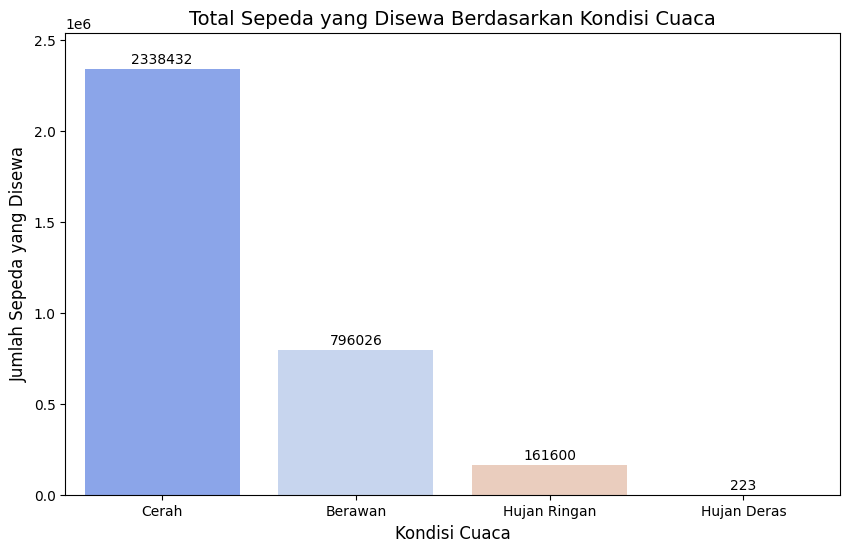

In [32]:
cnt_by_weathersit = data_hrfix.groupby('weathersit')['cnt'].sum().reset_index()
weathersit_map = ['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Deras']
cnt_by_weathersit['weathersit_name'] = cnt_by_weathersit['weathersit'].map(dict(zip(range(1, 5), weathersit_map)))
weathersit_order = ['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Deras']
cnt_by_weathersit['weathersit_name'] = pd.Categorical(
    cnt_by_weathersit['weathersit_name'], categories=weathersit_order, ordered=True
)
cnt_by_weathersit = cnt_by_weathersit.sort_values('weathersit_name')
plt.figure(figsize=(10, 6))
sns.barplot(data=cnt_by_weathersit, x='weathersit_name', y='cnt', palette='coolwarm')
for index, value in enumerate(cnt_by_weathersit['cnt']):
    plt.text(index, value + 30000, f'{value:.0f}', ha='center', fontsize=10)
y_min = 0
y_max = int(max(cnt_by_weathersit['cnt']) + 200000)
plt.ylim(y_min, y_max)
plt.title('Total Sepeda yang Disewa Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Sepeda yang Disewa', fontsize=12)
plt.show()

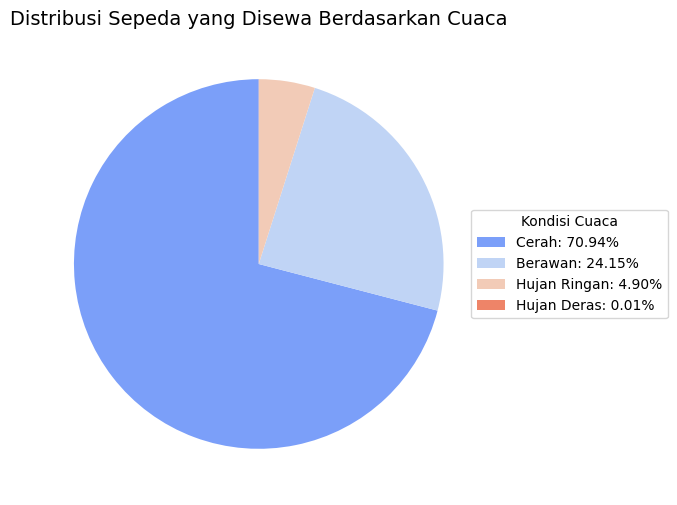

In [33]:
plt.figure(figsize=(6, 6))
cnt_by_weathersit['percentage'] = (cnt_by_weathersit['cnt'] / cnt_by_weathersit['cnt'].sum()) * 100
legend_labels = [
    f"{name}: {percentage:.2f}%"
    for name, percentage in zip(cnt_by_weathersit['weathersit_name'], cnt_by_weathersit['percentage'])]
plt.pie( cnt_by_weathersit['cnt'], colors=sns.color_palette('coolwarm', len(cnt_by_weathersit)), startangle=90)
plt.title('Distribusi Sepeda yang Disewa Berdasarkan Cuaca', fontsize=14)
plt.legend(title='Kondisi Cuaca', labels=legend_labels, loc='center right', bbox_to_anchor=(1.4, 0.5), frameon=True)
plt.show()

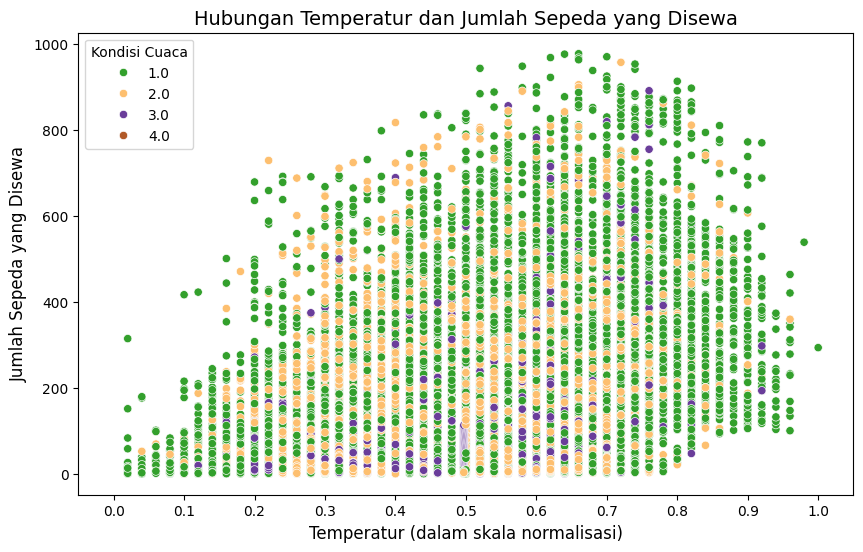

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_hrfix, x='temp', y='cnt', hue='weathersit', palette={1:clr(0.25), 2:clr(0.50), 3:clr(0.75), 4:clr(0.99)})
plt.title('Hubungan Temperatur dan Jumlah Sepeda yang Disewa', fontsize=14)
plt.xlabel('Temperatur (dalam skala normalisasi)', fontsize=12)
plt.ylabel('Jumlah Sepeda yang Disewa', fontsize=12)
plt.legend(title='Kondisi Cuaca')
plt.xticks([i/10 for i in range(11)])
plt.xlim(-0.05, 1.05)
plt.show()

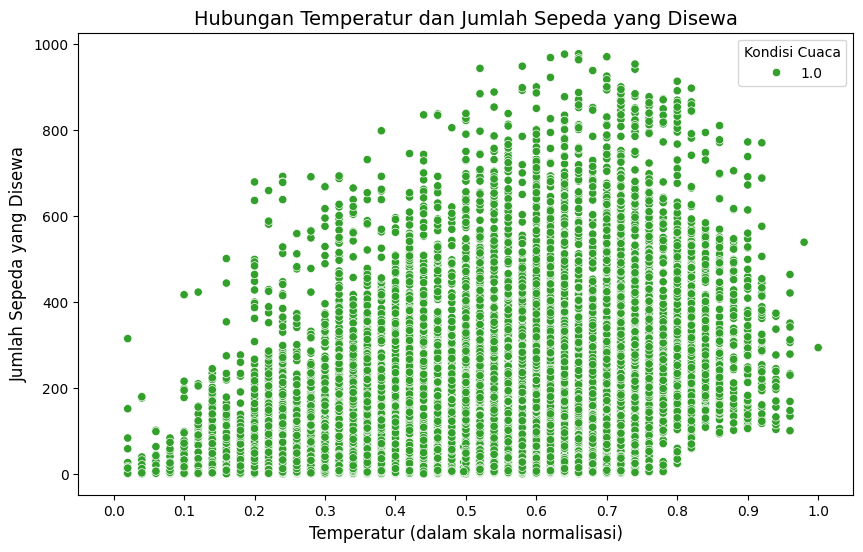

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_hrfix[data_hrfix['weathersit'] == 1], x='temp', y='cnt', hue='weathersit', palette={1:clr(0.25), 2:clr(0.50), 3:clr(0.75), 4:clr(0.99)})
plt.title('Hubungan Temperatur dan Jumlah Sepeda yang Disewa', fontsize=14)
plt.xlabel('Temperatur (dalam skala normalisasi)', fontsize=12)
plt.ylabel('Jumlah Sepeda yang Disewa', fontsize=12)
plt.legend(title='Kondisi Cuaca')
plt.xticks([i/10 for i in range(11)])
plt.xlim(-0.05, 1.05)
plt.show()

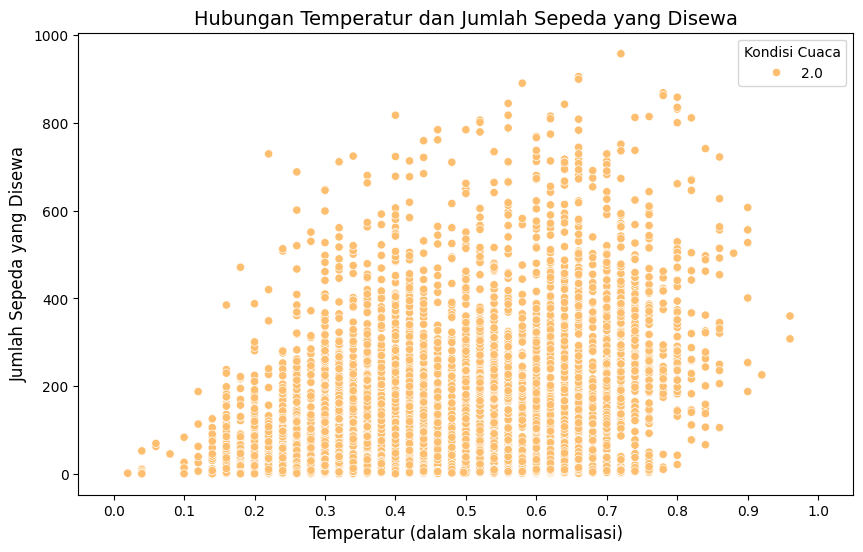

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_hrfix[data_hrfix['weathersit'] == 2], x='temp', y='cnt', hue='weathersit', palette={1:clr(0.25), 2:clr(0.50), 3:clr(0.75), 4:clr(0.99)})
plt.title('Hubungan Temperatur dan Jumlah Sepeda yang Disewa', fontsize=14)
plt.xlabel('Temperatur (dalam skala normalisasi)', fontsize=12)
plt.ylabel('Jumlah Sepeda yang Disewa', fontsize=12)
plt.legend(title='Kondisi Cuaca')
plt.xticks([i/10 for i in range(11)])
plt.xlim(-0.05, 1.05)
plt.show()

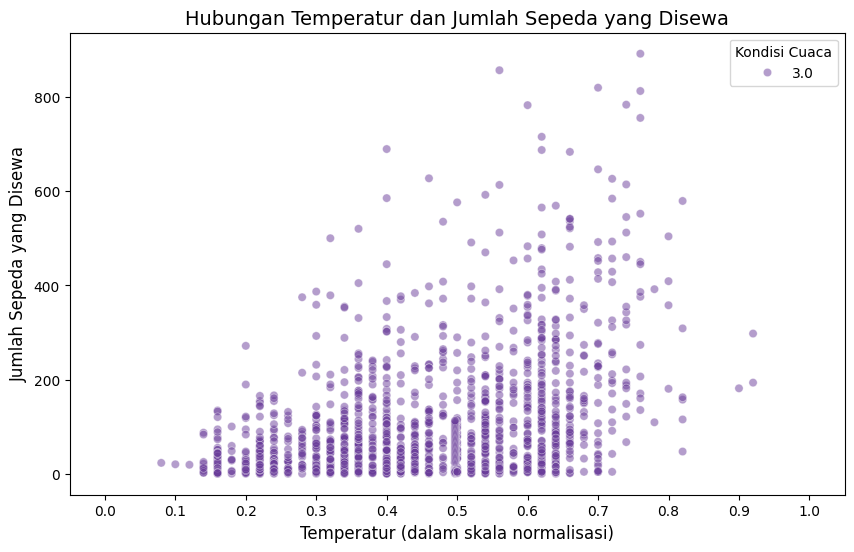

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_hrfix[data_hrfix['weathersit'] == 3], x='temp', y='cnt', hue='weathersit', palette={1:clr(0.25), 2:clr(0.50), 3:clr(0.75), 4:clr(0.99)}, alpha=0.5)
plt.title('Hubungan Temperatur dan Jumlah Sepeda yang Disewa', fontsize=14)
plt.xlabel('Temperatur (dalam skala normalisasi)', fontsize=12)
plt.ylabel('Jumlah Sepeda yang Disewa', fontsize=12)
plt.legend(title='Kondisi Cuaca')
plt.xticks([i/10 for i in range(11)])
plt.xlim(-0.05, 1.05)
plt.show()

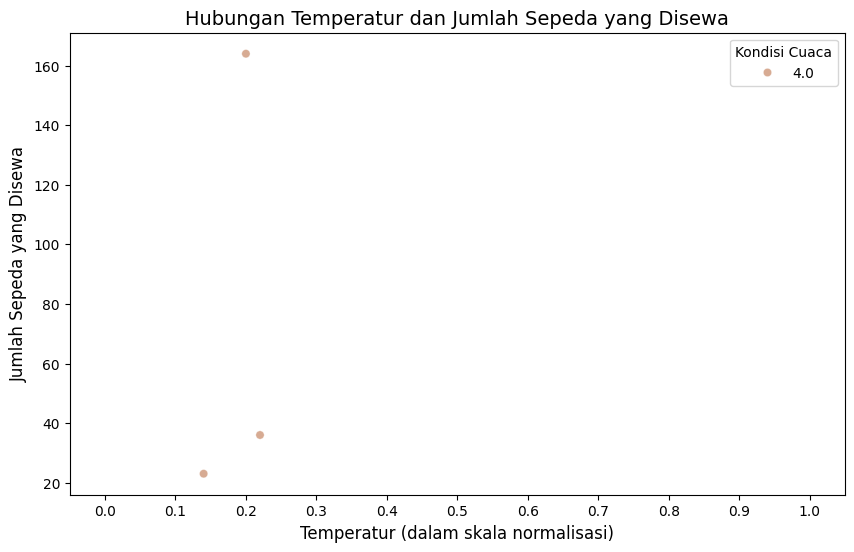

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_hrfix[data_hrfix['weathersit'] == 4], x='temp', y='cnt', hue='weathersit', palette={1:clr(0.25), 2:clr(0.50), 3:clr(0.75), 4:clr(0.99)}, alpha=0.5)
plt.title('Hubungan Temperatur dan Jumlah Sepeda yang Disewa', fontsize=14)
plt.xlabel('Temperatur (dalam skala normalisasi)', fontsize=12)
plt.ylabel('Jumlah Sepeda yang Disewa', fontsize=12)
plt.legend(title='Kondisi Cuaca')
plt.xticks([i/10 for i in range(11)])
plt.xlim(-0.05, 1.05)
plt.show()

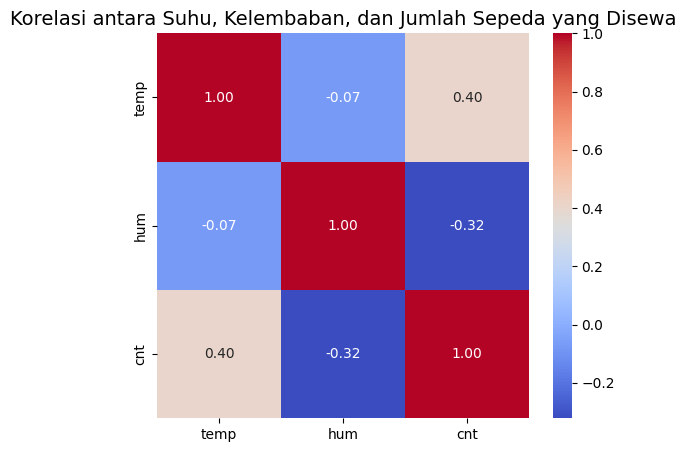

In [39]:
corr_data = data_hrfix[['temp', 'hum', 'cnt']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Suhu, Kelembaban, dan Jumlah Sepeda yang Disewa', fontsize=14)
plt.show()

### Pertanyaan 2: Analisis Layanan: Jam berapa dan hari apa permintaan sepeda paling tinggi?

<ipython-input-40-2f2d2076873e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_hrfix.groupby('hr')['cnt'].sum().reset_index(), x='hr', y='cnt', palette='viridis')


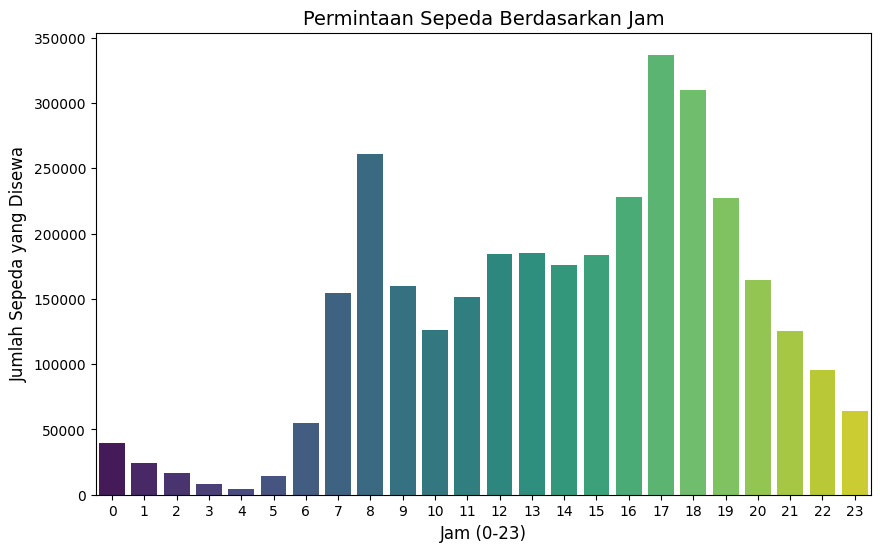

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_hrfix.groupby('hr')['cnt'].sum().reset_index(), x='hr', y='cnt', palette='viridis')
plt.title('Permintaan Sepeda Berdasarkan Jam', fontsize=14)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Jumlah Sepeda yang Disewa', fontsize=12)
plt.xticks(range(0, 24))
plt.show()

<ipython-input-41-031ea51dc696>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cnt_by_weekday, x='weekday_name', y='cnt', palette='viridis')


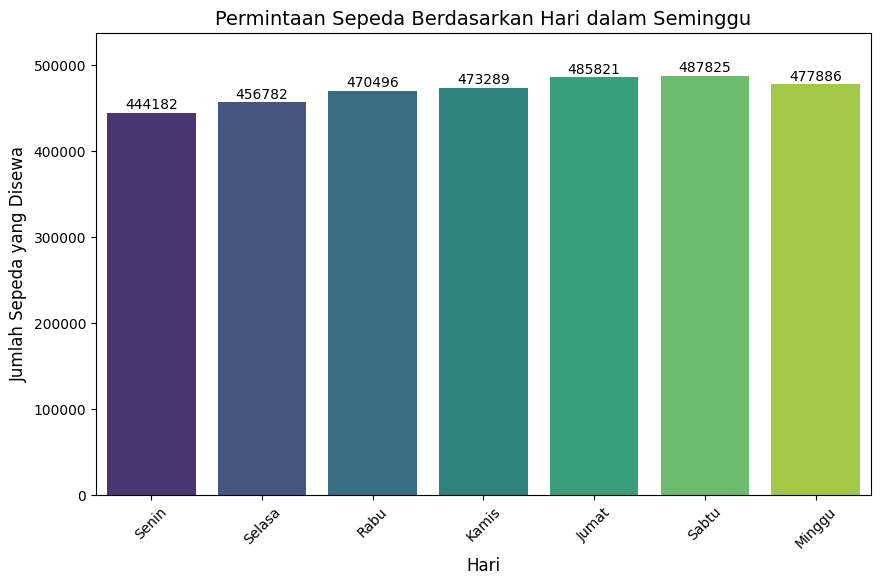

In [41]:
weekday_map = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
data_hrfix['weekday_name'] = data_hrfix['weekday'].map(dict(zip(range(7), weekday_map)))
cnt_by_weekday = data_hrfix.groupby('weekday_name')['cnt'].sum().reset_index()
weekday_order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
cnt_by_weekday['weekday_name'] = pd.Categorical(cnt_by_weekday['weekday_name'], categories=weekday_order, ordered=True)
cnt_by_weekday = cnt_by_weekday.sort_values('weekday_name')
plt.figure(figsize=(10, 6))
sns.barplot(data=cnt_by_weekday, x='weekday_name', y='cnt', palette='viridis')
for index, value in enumerate(cnt_by_weekday['cnt']):
    plt.text(index, value + 5000, f'{value:.0f}', ha='center', fontsize=10)
y_min = 0
y_max = int(max(cnt_by_weekday['cnt']) + 50000)
plt.ylim(y_min, y_max)
plt.title('Permintaan Sepeda Berdasarkan Hari dalam Seminggu', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jumlah Sepeda yang Disewa', fontsize=12)
plt.xticks(rotation=45)
plt.show()

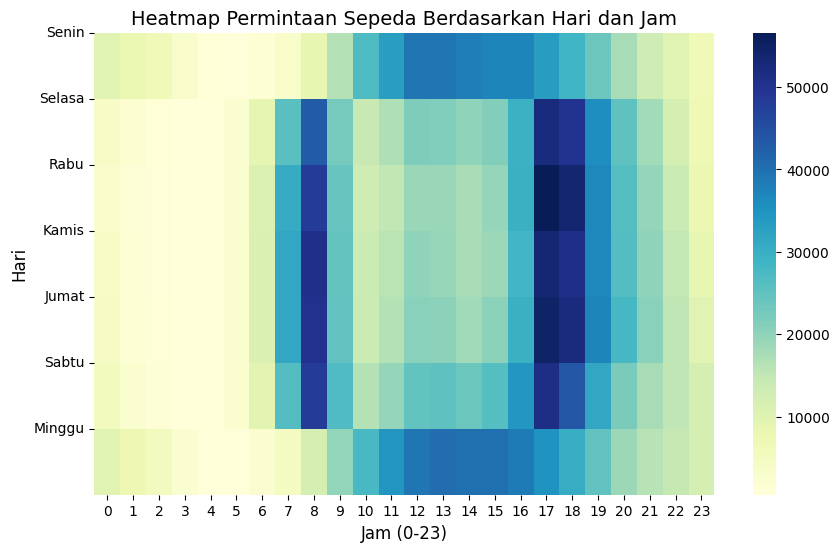

In [42]:
heatmap_data = data_hrfix.groupby(['weekday', 'hr'])['cnt'].sum().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar=True)
plt.title('Heatmap Permintaan Sepeda Berdasarkan Hari dan Jam', fontsize=14)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Hari', fontsize=12)
plt.yticks(ticks=range(7), labels=weekday_map, rotation=0)
plt.show()

## Analisis Lanjutan (Opsional)

In [43]:
data_hrfix['hr'].describe()

,hr
count,17544.000000
mean,11.500000
std,6.922384
min,0.000000
25%,5.750000
50%,11.500000
75%,17.250000
max,23.000000


In [44]:
data_hrfix['busy_hour'] = data_hrfix['hr'].apply(lambda x: 'Busy' if 7 <= x <= 9 or 17 <= x <= 19 else 'Non-Busy')

In [45]:
bins = [0, 50, 200, 500, 1000]
labels = ['Very Low', 'Low', 'Medium', 'High']
data_hrfix['demand_category'] = pd.cut(data_hrfix['cnt'], bins=bins, labels=labels)

In [46]:
data_hrfix

,dteday,hr,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_name,busy_hour,demand_category
0,2011-01-01,0,4,0.0,1,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,Minggu,Non-Busy,Very Low
1,2011-01-01,1,4,0.0,1,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,Minggu,Non-Busy,Very Low
2,2011-01-01,2,4,0.0,1,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0,Minggu,Non-Busy,Very Low
3,2011-01-01,3,4,0.0,1,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,Minggu,Non-Busy,Very Low
4,2011-01-01,4,4,0.0,1,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,Minggu,Non-Busy,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2012-12-31,19,4,1.0,12,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0,Selasa,Busy,Low
17540,2012-12-31,20,4,1.0,12,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0,Selasa,Non-Busy,Low
17541,2012-12-31,21,4,1.0,12,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0,Selasa,Non-Busy,Low
17542,2012-12-31,22,4,1.0,12,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0,Selasa,Non-Busy,Low


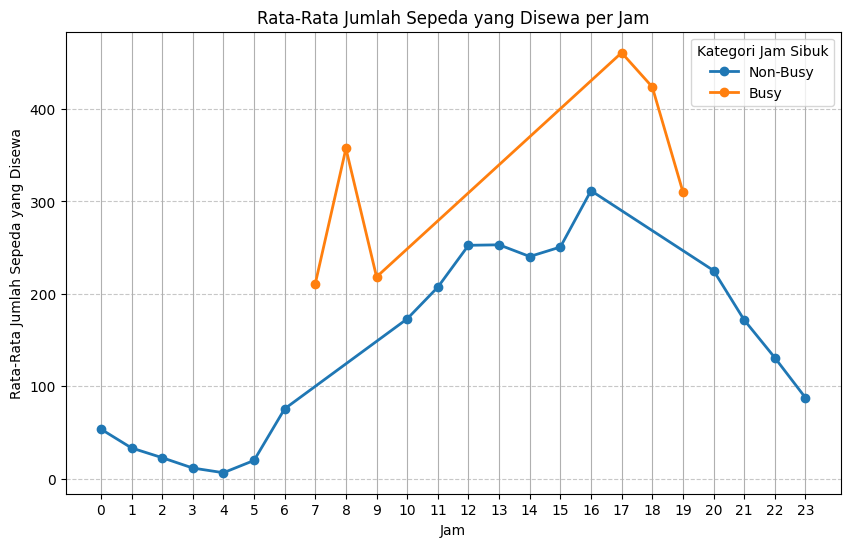

In [47]:
busynonbusy = data_hrfix.groupby(['hr', 'busy_hour'])['cnt'].mean().reset_index()
plt.figure(figsize=(10,6))
for busy_hour in ['Non-Busy', 'Busy']:
    subset = busynonbusy[busynonbusy['busy_hour'] == busy_hour]
    plt.plot(subset['hr'], subset['cnt'], label=busy_hour, marker='o', markersize=6, linewidth=2)
plt.title('Rata-Rata Jumlah Sepeda yang Disewa per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Jumlah Sepeda yang Disewa')
plt.legend(title='Kategori Jam Sibuk')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(True)
plt.xticks(range(24))
plt.show()

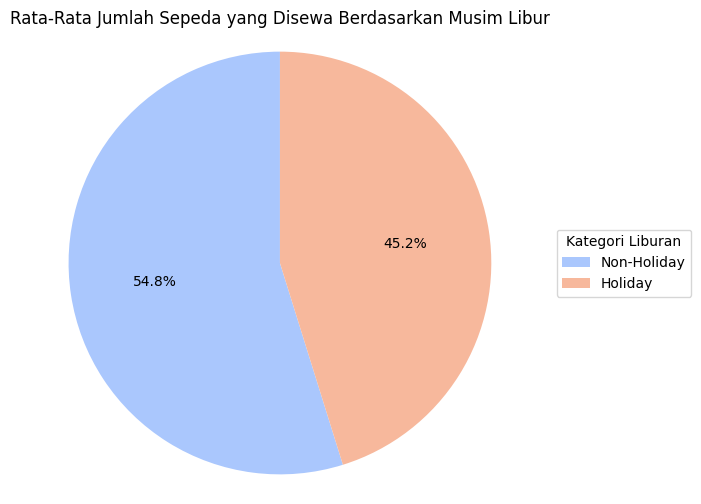

In [48]:
holiday_analysis = data_hrfix.groupby('holiday')['cnt'].mean().reset_index()
plt.figure(figsize=(6, 6))
labels = ['Non-Holiday', 'Holiday']
sizes = holiday_analysis['cnt']
plt.pie(sizes, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', n_colors=2))
plt.legend(title='Kategori Liburan', labels=labels, loc='center right', bbox_to_anchor=(1.4, 0.5), frameon=True)
plt.title('Rata-Rata Jumlah Sepeda yang Disewa Berdasarkan Musim Libur')
plt.axis('equal')
plt.show()

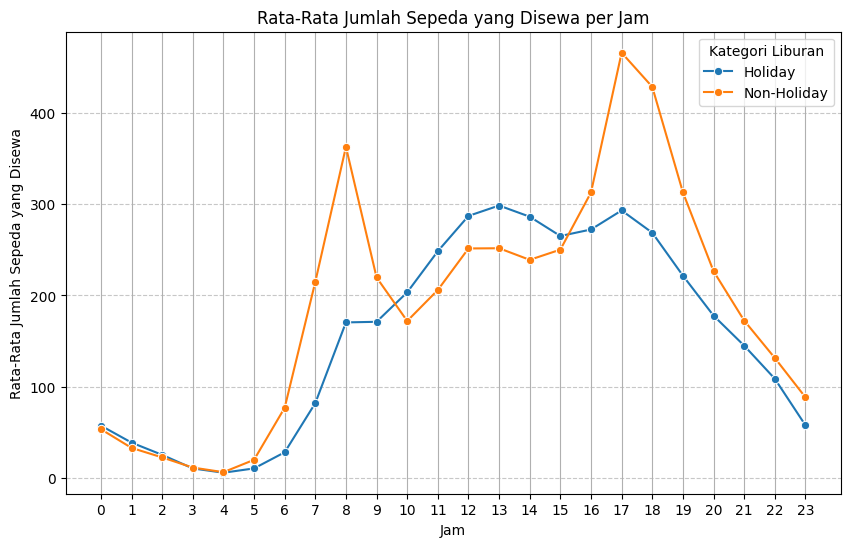

In [49]:
holiday_data = data_hrfix[data_hrfix['holiday'] == 1]
non_holiday_data = data_hrfix[data_hrfix['holiday'] == 0]
holiday_avg = holiday_data.groupby('hr')['cnt'].mean().reset_index()
non_holiday_avg = non_holiday_data.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=holiday_avg, x='hr', y='cnt', marker='o', label='Holiday')
sns.lineplot(data=non_holiday_avg, x='hr', y='cnt', marker='o', label='Non-Holiday')
plt.title('Rata-Rata Jumlah Sepeda yang Disewa per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Jumlah Sepeda yang Disewa')
plt.legend(title='Kategori Liburan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(True)
plt.xticks(range(24))
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

In [50]:
data_hrfix.to_csv("data_hrfix.csv", index=False)